## logistic regression

1. red wine quality prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:\\Users\\sharath\\Desktop\\all proj\\wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [70]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

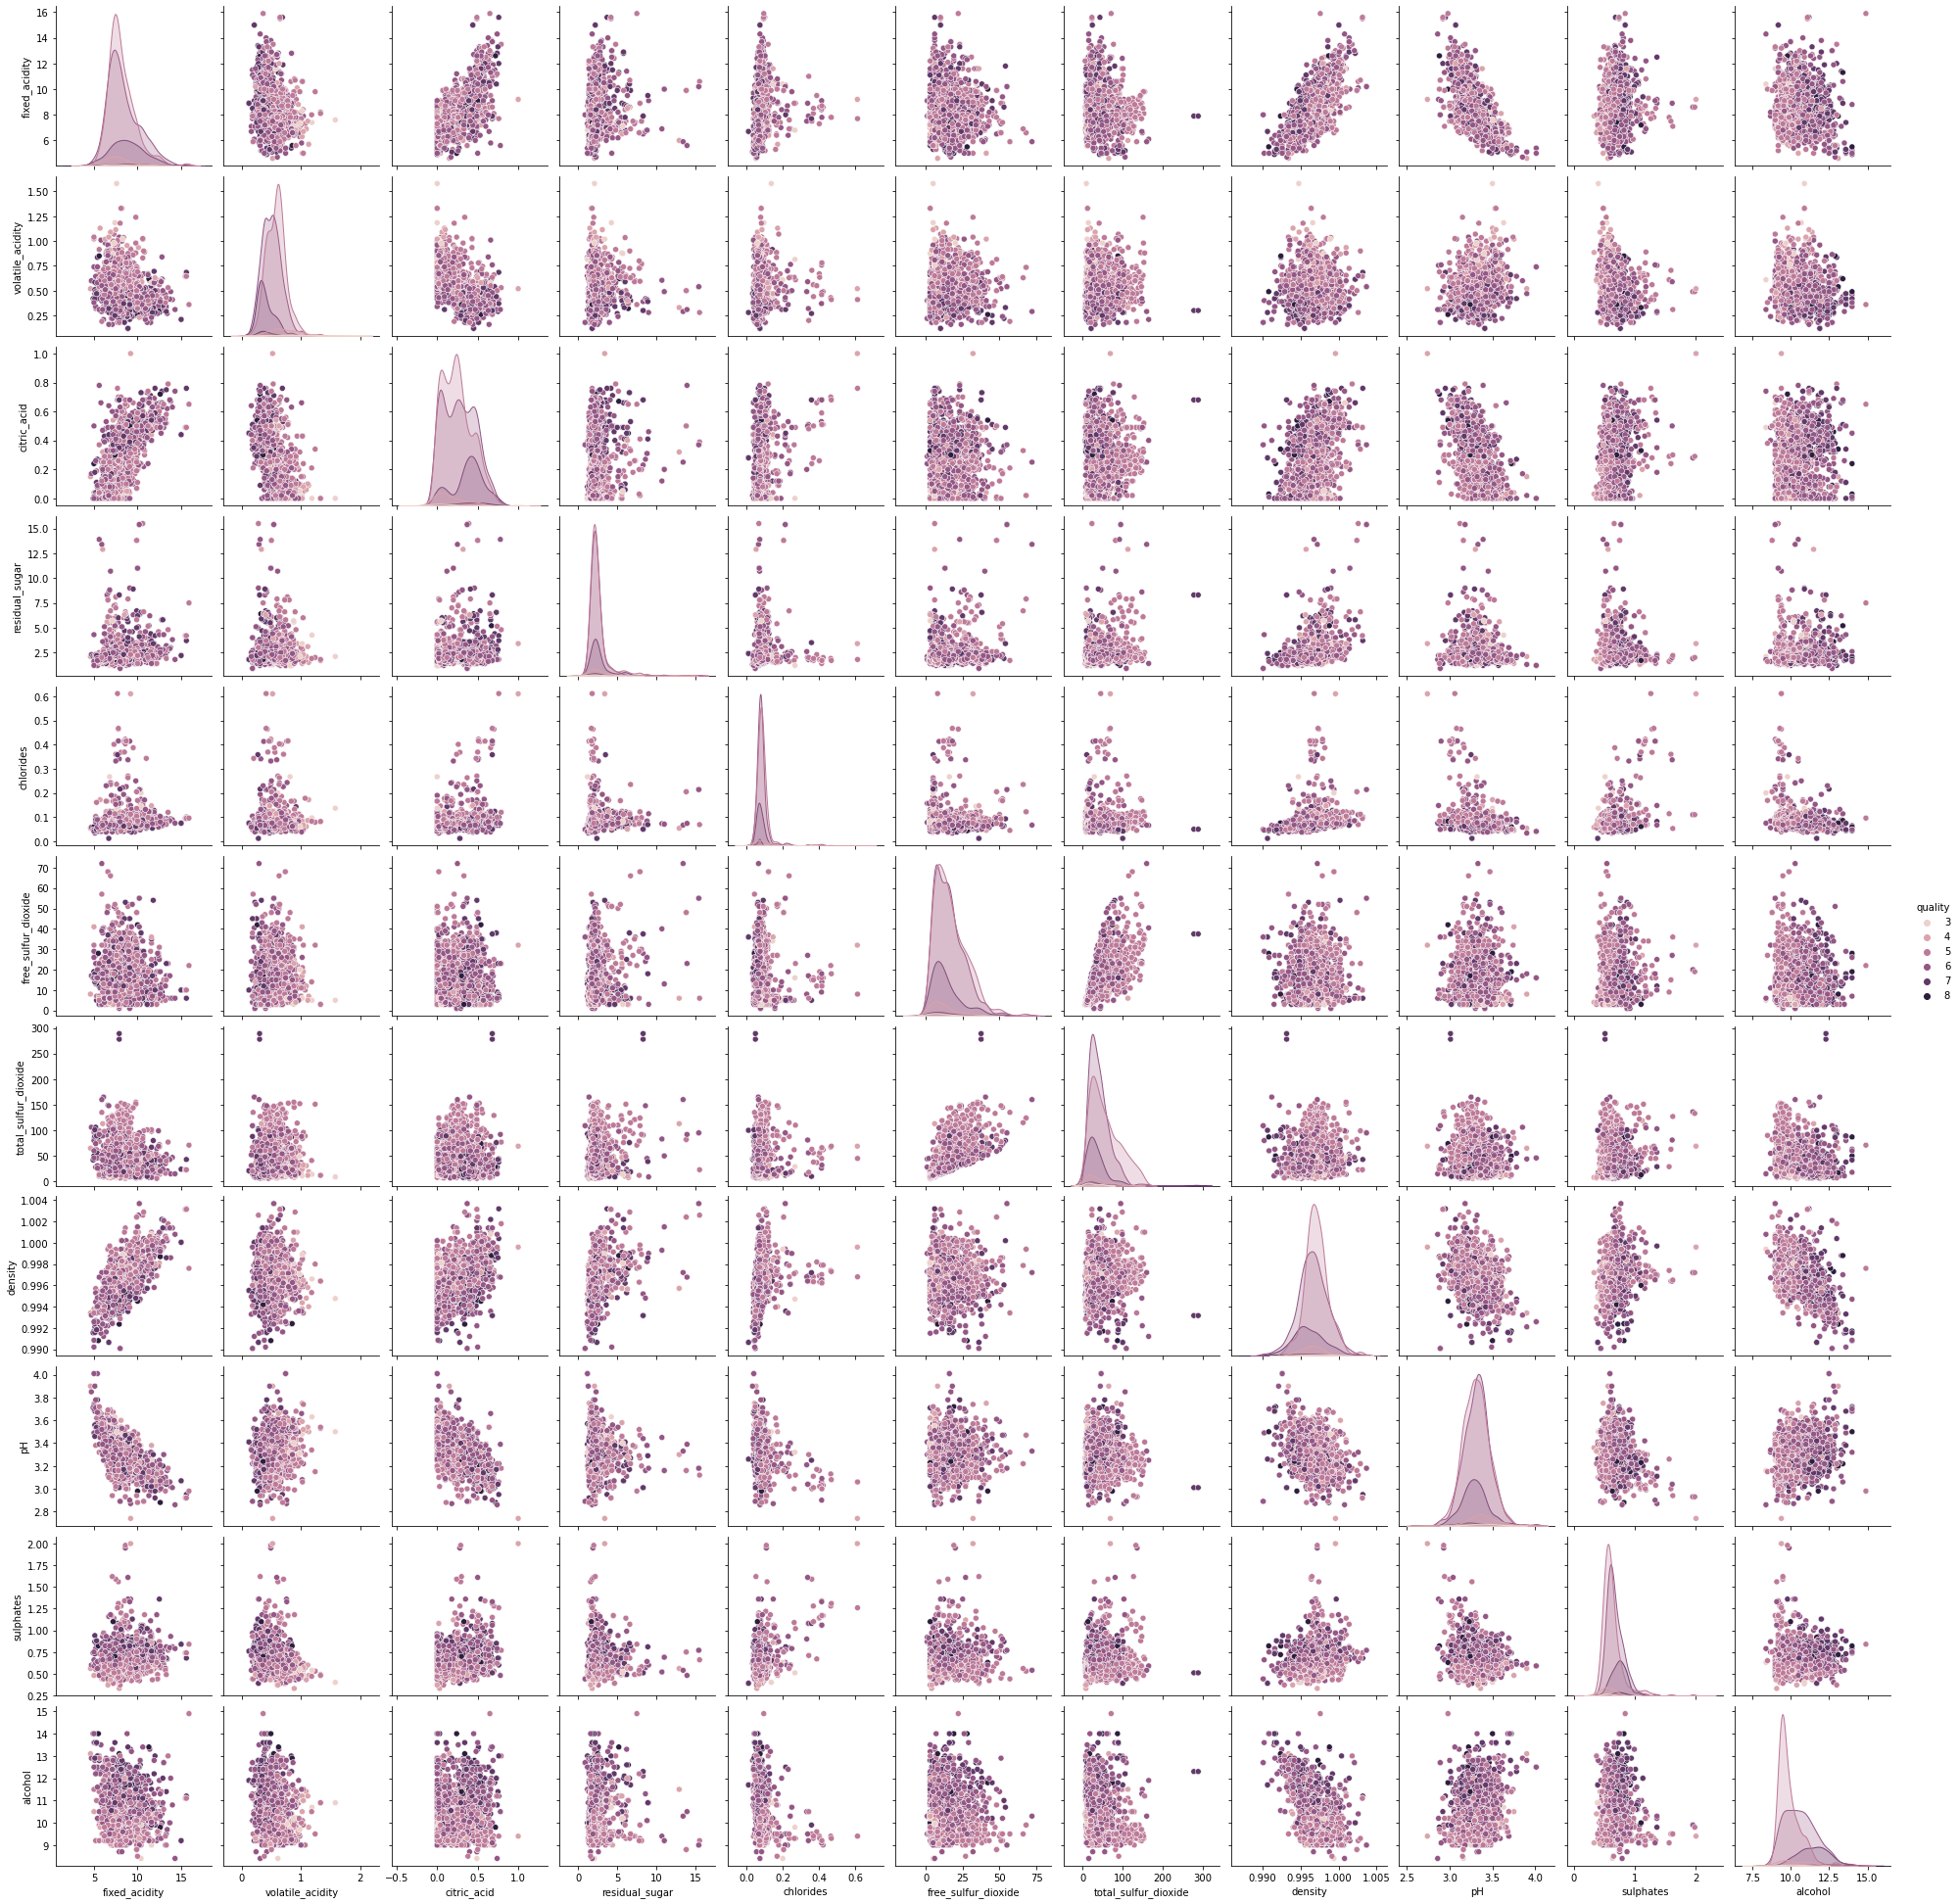

In [72]:
# sns.pairplot(df,hue="quality")

In [7]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [8]:
continues_var=df.iloc[:,:11]
continues_var

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


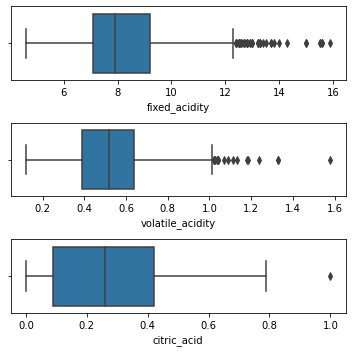

In [9]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['fixed_acidity'], ax = axs[0])
plt2 = sns.boxplot(df['volatile_acidity'], ax = axs[1])
plt3 = sns.boxplot(df['citric_acid'], ax = axs[2])
plt.tight_layout()
plt.tight_layout()

## treating the outliers of fixed acidity

In [10]:
upper_quartile = np.percentile(df.fixed_acidity, 75)
upper_quartile

9.2

In [11]:
lower_quartile = np.percentile(df.fixed_acidity, 25)
lower_quartile

7.1

In [12]:
iqr=upper_quartile-lower_quartile
iqr

2.0999999999999996

In [13]:
upper_lim = df.fixed_acidity[df.fixed_acidity<=upper_quartile+1.5*iqr].max()
upper_lim

12.3

In [14]:
df.fixed_acidity=np.where(df.fixed_acidity > upper_lim , upper_lim,df.fixed_acidity)

<AxesSubplot:xlabel='fixed_acidity'>

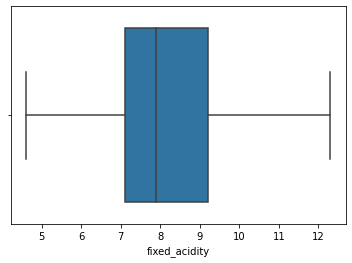

In [15]:
sns.boxplot(df["fixed_acidity"])

## anova for fixed acidity

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('fixed_acidity ~ quality', data = df).fit()
anova_table = sm.stats.anova_lm(mod)
print(anova_table)

              df       sum_sq    mean_sq          F        PR(>F)
quality      1.0    68.616174  68.616174  25.524549  4.869572e-07
Residual  1597.0  4293.123088   2.688242        NaN           NaN


## anova for volatile_acidity

In [17]:
mod = ols('volatile_acidity ~ quality', data = df).fit()
anova_table = sm.stats.anova_lm(mod)
print(anova_table)

              df     sum_sq   mean_sq          F        PR(>F)
quality      1.0   7.815254  7.815254  287.44445  2.051715e-59
Residual  1597.0  43.420426  0.027189        NaN           NaN


## treating outliers for citric acid

In [18]:
upper_quartile = np.percentile(df.citric_acid, 75)
upper_quartile

0.42

In [19]:
lower_quartile = np.percentile(df.citric_acid, 25)
lower_quartile

0.09

In [20]:
iqr=upper_quartile-lower_quartile
iqr

0.32999999999999996

In [21]:
upper_lim = df.citric_acid[df.citric_acid<=upper_quartile+1.5*iqr].max()
upper_lim

0.79

In [22]:
df.citric_acid=np.where(df.citric_acid > upper_lim , upper_lim,df.citric_acid)

<AxesSubplot:xlabel='citric_acid'>

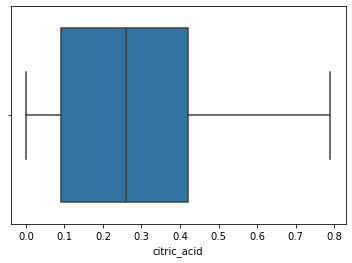

In [23]:
sns.boxplot(df["citric_acid"])

## anova for citric acid

In [24]:

mod = ols('citric_acid ~ quality', data = df).fit()
anova_table = sm.stats.anova_lm(mod)
print(anova_table)

              df     sum_sq   mean_sq          F        PR(>F)
quality      1.0   3.145106  3.145106  87.759622  2.429171e-20
Residual  1597.0  57.232855  0.035838        NaN           NaN


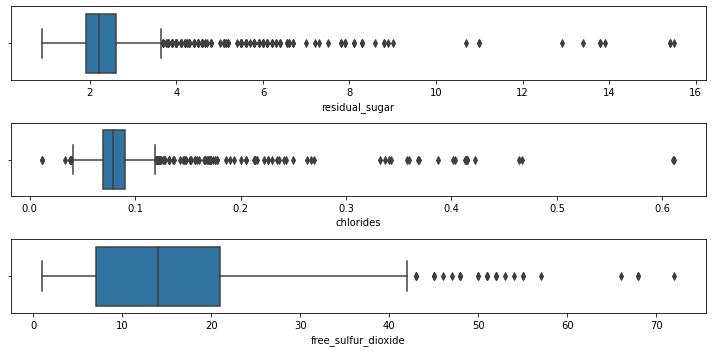

In [25]:
fig, axs = plt.subplots(3, figsize = (10,5))
plt1 = sns.boxplot(df['residual_sugar'], ax = axs[0])
plt2 = sns.boxplot(df['chlorides'], ax = axs[1])
plt3 = sns.boxplot(df['free_sulfur_dioxide'], ax = axs[2])
plt.tight_layout()

## anova for residual_sugar

In [26]:
mod = ols('residual_sugar ~ quality', data = df).fit()
anova_table = sm.stats.anova_lm(mod)
print(anova_table)

              df       sum_sq   mean_sq         F    PR(>F)
quality      1.0     0.598984  0.598984  0.301184  0.583218
Residual  1597.0  3176.060634  1.988767       NaN       NaN


## dropping residual sugar has the p value is greater than 0.05

## anova for chlorides

In [27]:
mod = ols('chlorides ~ quality', data = df).fit()
anova_table = sm.stats.anova_lm(mod)
print(anova_table)

              df    sum_sq  mean_sq          F        PR(>F)
quality      1.0  0.058820  0.05882  26.985608  2.313383e-07
Residual  1597.0  3.480977  0.00218        NaN           NaN


# anova for free sulfur 

In [28]:
mod = ols('free_sulfur_dioxide ~ quality', data = df).fit()
anova_table = sm.stats.anova_lm(mod)
print(anova_table)

              df         sum_sq     mean_sq         F    PR(>F)
quality      1.0     448.658548  448.658548  4.108502  0.042834
Residual  1597.0  174396.325817  109.202458       NaN       NaN


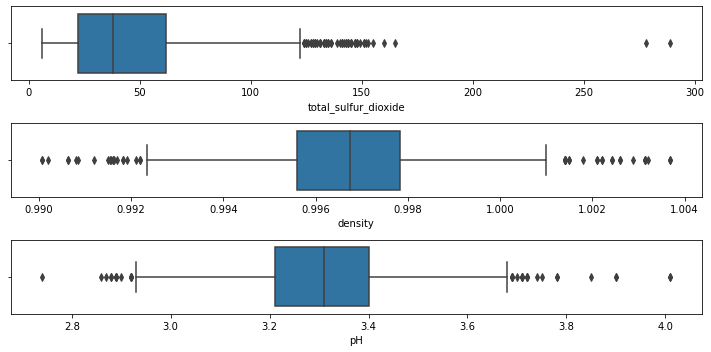

In [29]:
fig, axs = plt.subplots(3, figsize = (10,5))
plt1 = sns.boxplot(df['total_sulfur_dioxide'], ax = axs[0])
plt2 = sns.boxplot(df['density'], ax = axs[1])
plt3 = sns.boxplot(df['pH'], ax = axs[2])
plt.tight_layout()

In [30]:
upper_quartile = np.percentile(df.density, 75)
upper_quartile

0.997835

In [31]:
lower_quartile = np.percentile(df.density, 25)
lower_quartile

0.9956

In [32]:
iqr=upper_quartile-lower_quartile
iqr

0.002234999999999987

In [33]:
upper_lim = df.density[df.density<=upper_quartile+1.5*iqr].max()
upper_lim

1.001

In [34]:
lower_lim = df.density[df.density<=lower_quartile-1.5*iqr].min()
lower_lim

0.99007

In [35]:
df.density=np.where(df.density > upper_lim , upper_lim,df.density)

In [36]:
df.density=np.where(df.density < lower_lim , lower_lim,df.density)

<AxesSubplot:xlabel='density'>

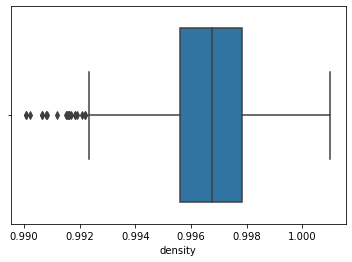

In [37]:
sns.boxplot(df["density"])

##  anova for density

In [38]:
mod = ols('density ~ quality', data = df).fit()
anova_table = sm.stats.anova_lm(mod)
print(anova_table)

              df    sum_sq   mean_sq          F        PR(>F)
quality      1.0  0.000176  0.000176  54.039109  3.124503e-13
Residual  1597.0  0.005201  0.000003        NaN           NaN


## anova for total_sulfur_dioxide

In [39]:
mod = ols('total_sulfur_dioxide ~ quality', data = df).fit()
anova_table = sm.stats.anova_lm(mod)
print(anova_table)

              df        sum_sq       mean_sq          F        PR(>F)
quality      1.0  5.924604e+04  59246.038646  56.657818  8.621703e-14
Residual  1597.0  1.669954e+06   1045.681623        NaN           NaN


## anova for ph

In [40]:
mod = ols('pH ~ quality', data = df).fit()
anova_table = sm.stats.anova_lm(mod)
print(anova_table)

              df     sum_sq   mean_sq         F    PR(>F)
quality      1.0   0.126946  0.126946  5.340462  0.020963
Residual  1597.0  37.961672  0.023771       NaN       NaN


## anova for sulphates

In [41]:
mod = ols('sulphates ~ quality', data = df).fit()
anova_table = sm.stats.anova_lm(mod)
print(anova_table)

              df     sum_sq   mean_sq           F        PR(>F)
quality      1.0   2.901833  2.901833  107.740433  1.802088e-24
Residual  1597.0  43.012888  0.026934         NaN           NaN


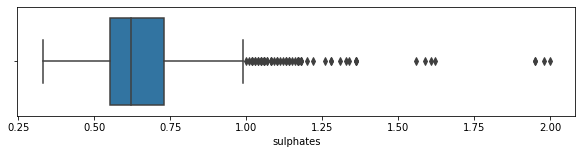

In [42]:
fig, axs = plt.subplots(1, figsize = (10,2))
sns.boxplot(df["sulphates"])
plt.show()

In [43]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
x=df.iloc[:,:11]

In [45]:
vif_data = pd.DataFrame()
vif_data["features"] = x.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
for i in range(len(x.columns))]
vif_data

,features,VIF
0,fixed_acidity,83.726916
1,volatile_acidity,17.039405
2,citric_acid,9.337948
3,residual_sugar,4.656979
4,chlorides,6.511209
5,free_sulfur_dioxide,6.450429
6,total_sulfur_dioxide,6.543223
7,density,1518.147315
8,pH,1070.467184
9,sulphates,21.572104


In [46]:
df = df.drop(["fixed_acidity"],axis=1)

In [47]:
x=df.iloc[:,:10]
vif_data = pd.DataFrame()
vif_data["features"] = x.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
for i in range(len(x.columns))]
vif_data

,features,VIF
0,volatile_acidity,16.111643
1,citric_acid,6.509216
2,residual_sugar,4.646635
3,chlorides,6.081219
4,free_sulfur_dioxide,6.412107
5,total_sulfur_dioxide,6.014446
6,density,800.172015
7,pH,742.856813
8,sulphates,21.491373
9,alcohol,122.983957


In [48]:
df = df.drop(["density"],axis=1)

In [49]:
x=df.iloc[:,:9]
vif_data = pd.DataFrame()
vif_data["features"] = x.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
for i in range(len(x.columns))]
vif_data

,features,VIF
0,volatile_acidity,15.368692
1,citric_acid,4.939034
2,residual_sugar,4.638239
3,chlorides,5.935903
4,free_sulfur_dioxide,6.392745
5,total_sulfur_dioxide,5.962786
6,pH,147.496538
7,sulphates,21.194685
8,alcohol,121.908709


In [50]:
df = df.drop(["pH"],axis=1)

In [51]:
x=df.iloc[:,:8]
vif_data = pd.DataFrame()
vif_data["features"] = x.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
for i in range(len(x.columns))]
vif_data

,features,VIF
0,volatile_acidity,12.870652
1,citric_acid,4.903587
2,residual_sugar,4.638199
3,chlorides,5.883490
4,free_sulfur_dioxide,6.353343
5,total_sulfur_dioxide,5.904131
6,sulphates,20.633043
7,alcohol,32.015728


In [52]:
df = df.drop(["sulphates"],axis=1)

In [53]:
x=df.iloc[:,:7]
vif_data = pd.DataFrame()
vif_data["features"] = x.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
for i in range(len(x.columns))]
vif_data

,features,VIF
0,volatile_acidity,12.740629
1,citric_acid,4.808562
2,residual_sugar,4.620596
3,chlorides,4.779490
4,free_sulfur_dioxide,6.339638
5,total_sulfur_dioxide,5.878798
6,alcohol,20.077172


In [54]:
df = df.drop(["volatile_acidity"],axis=1)

In [55]:
x=df.iloc[:,:6]
vif_data = pd.DataFrame()
vif_data["features"] = x.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
for i in range(len(x.columns))]
vif_data

,features,VIF
0,citric_acid,3.237422
1,residual_sugar,4.565826
2,chlorides,4.268127
3,free_sulfur_dioxide,6.152416
4,total_sulfur_dioxide,5.495560
5,alcohol,8.515488


In [56]:
df=df.drop(["residual_sugar"],axis=1)

In [57]:
df=df.drop(["alcohol"],axis=1)

In [76]:
X = df.loc[:, df.columns != 'quality']
y = df.loc[:, df.columns == 'quality']

In [59]:
## one over rest model

In [62]:
from sklearn.linear_model import LogisticRegression

In [77]:
df = LogisticRegression(multi_class= 'ovr')
df.fit(X,y)
print("accuracy=", df.score(X,y))

accuracy= 0.5834896810506567


In [79]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import classification_report
from sklearn.utils import resample

# decision tree

In [84]:
pred_ovr = df.predict(X)
print("ovr\n")
print(metrics.confusion_matrix(y, pred_ovr))
print(metrics.classification_report(y, pred_ovr))

ovr

[[  0   0   9   1   0   0]
 [  0   0  37  16   0   0]
 [  0   0 519 160   2   0]
 [  0   0 232 398   8   0]
 [  0   0  13 170  16   0]
 [  0   0   0  13   5   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        53
           5       0.64      0.76      0.70       681
           6       0.53      0.62      0.57       638
           7       0.52      0.08      0.14       199
           8       0.00      0.00      0.00        18

    accuracy                           0.58      1599
   macro avg       0.28      0.24      0.23      1599
weighted avg       0.55      0.58      0.54      1599



In [81]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [82]:
model.fit(X,y)

DecisionTreeClassifier()

In [85]:
model.score(X,y)

1.0

# random forest

In [89]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_features = 'sqrt')

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.60, random_state = 45)

In [92]:
rfFit = rf.fit(X_train, y_train)

In [94]:
y_predRF = rfFit.predict(X_test)

In [100]:
rf.score(X_test,y_test)

0.6375

In [101]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        28
           5       0.69      0.75      0.72       422
           6       0.60      0.62      0.61       386
           7       0.57      0.51      0.54       106
           8       0.33      0.10      0.15        10

    accuracy                           0.64       960
   macro avg       0.37      0.33      0.34       960
weighted avg       0.61      0.64      0.62       960

